# Candidacy Exam Paper
## Cameron Bale
***
#### Code for pre-processing the location data for South Korean COVID-19 patients.
***

In [1]:
from pyproj import Proj
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline

First, we create a coordinate reference system for locations in Korea measured in meters.

In [2]:
p = Proj("epsg:5179")

In [3]:
p.crs

<Derived Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Now, we import the data. `PatientRoute.csv` contains patient ID and various corresponding latitude and longitude measurements. `PatientInfo.csv` contains some patient information such as their year of birth (can be used to infer age), gender, and whether the person was deceased.

In [4]:
routes = pd.read_csv("Data/PatientRoute.csv")
info = pd.read_csv("Data/PatientInfo.csv")

In [5]:
routes

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,1/22/2020,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,1/24/2020,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,1/25/2020,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,1/26/2020,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,1/26/2020,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
...,...,...,...,...,...,...,...,...
8087,6100000090,NaN,3/24/2020,Seoul,Gangseo-gu,airport,37.558655,126.794474
8088,6100000090,NaN,3/24/2020,Busan,Gangseo-gu,airport,35.173220,128.946459
8089,6100000090,NaN,3/25/2020,Gyeongsangnam-do,Yangsan-si,store,35.336944,129.026389
8090,6100000090,NaN,3/25/2020,Gyeongsangnam-do,Yangsan-si,hospital,35.335757,129.025003


In [6]:
info

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18,NaN,2020-04-03,2020-04-21,NaN,released
4000,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7000000009,5,NaN,2020-04-03,NaN,NaN,isolated
4001,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9,NaN,2020-04-03,2020-05-05,NaN,released
4002,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6,NaN,2020-04-14,2020-04-26,NaN,released


We merge the patient information to the locations, and take only the subset of variables we are interested in.

In [7]:
X = pd.merge(routes, info, how = "left", on = "patient_id")[["latitude", "longitude", "sex", "age", "state"]]

In [8]:
X

,latitude,longitude,sex,age,state
0,37.615246,126.715632,male,50s,released
1,37.567241,127.005659,male,50s,released
2,37.592560,127.017048,male,30s,released
3,37.591810,127.016822,male,30s,released
4,37.563992,127.029534,male,30s,released
...,...,...,...,...,...
8087,37.558655,126.794474,male,40s,released
8088,35.173220,128.946459,male,40s,released
8089,35.336944,129.026389,male,40s,released
8090,35.335757,129.025003,male,40s,released


For simplicity, we drop observations with missing values (alternatively, these could be imputed).

In [9]:
X = X.dropna()

We convert the state variable to a binary variable.

In [10]:
new_state = (X["state"] == "deceased").astype(int)

In [11]:
X = X.assign(state=new_state).reset_index(drop=True)

In [12]:
X

,latitude,longitude,sex,age,state
0,37.615246,126.715632,male,50s,0
1,37.567241,127.005659,male,50s,0
2,37.592560,127.017048,male,30s,0
3,37.591810,127.016822,male,30s,0
4,37.563992,127.029534,male,30s,0
...,...,...,...,...,...
6707,37.558655,126.794474,male,40s,0
6708,35.173220,128.946459,male,40s,0
6709,35.336944,129.026389,male,40s,0
6710,35.335757,129.025003,male,40s,0


In [13]:
X.to_csv("Data/pre-cleaned-data.csv", index = False)

We can check the minimum and maximum `latitude` and `longitude` values; and they fall within the boundaries of the coordinate reference system defined above.

In [14]:
X.describe()

,latitude,longitude,state
count,6712.000000,6712.000000,6712.000000
mean,36.753985,127.633289,0.008194
std,0.914046,0.900125,0.090157
min,33.454642,126.301005,0.000000
25%,35.891794,126.939025,0.000000
50%,37.331956,127.110486,0.000000
75%,37.514121,128.500770,0.000000
max,38.193169,129.475746,1.000000


We perform the projection from latitude and longitude to meters for the patient locations.

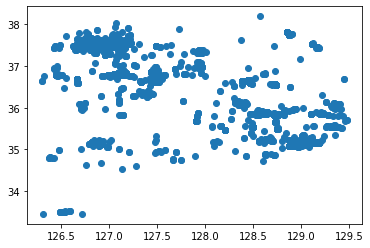

In [15]:
plt.scatter(X["longitude"], X["latitude"])

In [19]:
lons, lats = p(X["longitude"], X["latitude"])

In [23]:
new_locs = pd.DataFrame([lats, lons]).T

In [24]:
new_locs

,0,1
0,1.957601e+06,9.307758e+05
1,1.952101e+06,9.563442e+05
2,1.954905e+06,9.573645e+05
3,1.954822e+06,9.573441e+05
4,1.951730e+06,9.584509e+05
...,...,...
6707,1.951268e+06,9.376869e+05
6708,1.687396e+06,1.131718e+06
6709,1.705664e+06,1.138718e+06
6710,1.705530e+06,1.138594e+06


In [25]:
new_locs.columns = ["latitude", "longitude"]

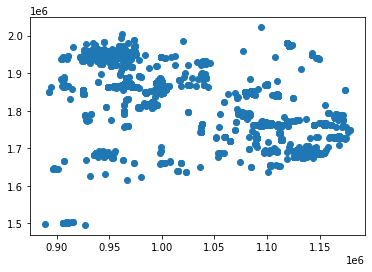

In [27]:
plt.scatter(new_locs["longitude"], new_locs["latitude"])
plt.show()

We will standardize the location measurements. Overall, we will treat `latitude`, `longitude`, as continuous, and `state`, as categorical.

In [28]:
# standardize location measurements
means = np.mean(new_locs[["latitude", "longitude"]], axis = 0)
stds = np.std(new_locs[["latitude", "longitude"]], axis = 0)
new_locs[["latitude", "longitude"]] = (new_locs[["latitude", "longitude"]]-means)/stds

standardization_stats = pd.DataFrame({"means":means, "stds":stds})

In [29]:
means

latitude     1.862157e+06
longitude    1.012614e+06
dtype: float64

In [30]:
stds

latitude     101089.342153
longitude     80975.132079
dtype: float64

In [31]:
standardization_stats

,means,stds
latitude,1.862157e+06,101089.342153
longitude,1.012614e+06,80975.132079


In [32]:
X = X.assign(longitude=new_locs.longitude, latitude=new_locs.latitude)

In [33]:
X

,latitude,longitude,sex,age,state
0,0.944157,-1.010655,male,50s,0
1,0.889746,-0.694899,male,50s,0
2,0.917482,-0.682299,male,30s,0
3,0.916660,-0.682551,male,30s,0
4,0.886074,-0.668883,male,30s,0
...,...,...,...,...,...
6707,0.881500,-0.925307,male,40s,0
6708,-1.728784,1.470871,male,40s,0
6709,-1.548071,1.557316,male,40s,0
6710,-1.549392,1.555785,male,40s,0


In [34]:
X.to_csv("Data/cleaned_data.csv", index = False)
standardization_stats.to_csv("Data/standardization_stats.csv", index = False)